# 1. Text Processing Basics
*Carlos A. Toruño Paniagua*

## Loading and preparing the data

In [1]:
import pandas as pd

speech_data = pd.read_csv("..\..\Data\master_data.csv")
# speech_data.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], inplace = True)
speech_data.head(5)

,headline,date,content,url
0,Compañera Rosario Murillo: La compañera Darlin...,2023-12-27,MANAGUA – NICARAGUA / Este miércoles 27 de dic...,https://www.canal4.com.ni/companera-rosario-mu...
1,Compañera Rosario Murillo: Vamos a rendir hono...,2023-12-26,MANAGUA – NICARAGUA / La Vicepresidenta de Nic...,https://www.canal4.com.ni/companera-rosario-mu...
2,Compañera Rosario Murillo: Profundamente conmo...,2023-12-24,MANAGUA – NICARAGUA / Este sábado 23 de diciem...,https://www.canal4.com.ni/companera-rosario-mu...
3,Compañera Rosario Murillo: El Aeropuerto Inter...,2023-12-22,MANAGUA – NICARAGUA / Este viernes 22 de dicie...,https://www.canal4.com.ni/companera-rosario-mu...
4,Compañera Rosario Murillo: Cuarto ejercicio na...,2023-12-21,MANAGUA – NICARAGUA / Este jueves 21 de diciem...,https://www.canal4.com.ni/companera-rosario-mu...


In [2]:
import numpy as np

# Identifying the spoke person
speech_data["spoke_Rosario"] = speech_data["headline"].str.contains("Rosario")
speech_data["spoke_Daniel"]  = speech_data["headline"].str.contains("Daniel")
speech_data["spoke_person"]  = np.select([speech_data["spoke_Rosario"], speech_data["spoke_Daniel"]], 
                                         ["Rosario", "Daniel"], 
                                         default = "None")
speech_data = speech_data.loc[speech_data["spoke_person"] != "None"]

# Setting date format
speech_data["date"] = pd.to_datetime(speech_data["date"], format = "%Y-%m-%d")

## Exploring the data

In [3]:
from matplotlib import font_manager
font_files = [i for i in font_manager.findSystemFonts(fontpaths=None, fontext='ttf') 
              if 'lato' in i.lower()]

for file in font_files:
    font_manager.fontManager.addfont(file)

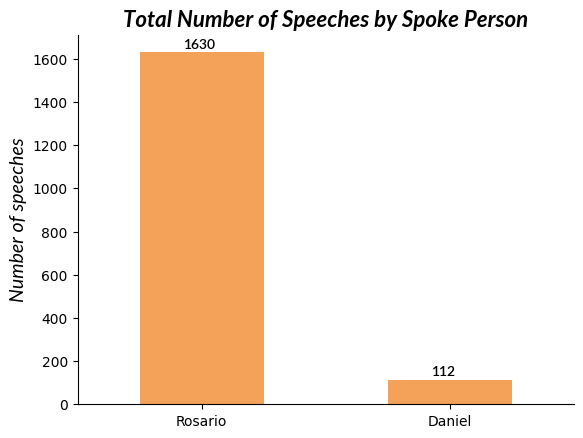

In [4]:
import matplotlib.pyplot as plt

ax = speech_data.value_counts("spoke_person").plot(kind = "bar", color = "#F4A259")
ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis  = "both", 
               which = "major",
               labelsize = 10)
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        xy = (p.get_x()+0.175, p.get_height() + 20), 
        fontsize   = 10,
        fontname   = "Lato",
        fontweight = "650"
    )
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.ylabel("Number of speeches",
           fontname   = "Lato",
           fontstyle  = "italic",
           fontsize   = 14)
plt.title("Total Number of Speeches by Spoke Person",
          fontname   = "Lato",
          fontweight = "bold",
          fontstyle  = "italic",
          fontsize   = 16)
plt.show()

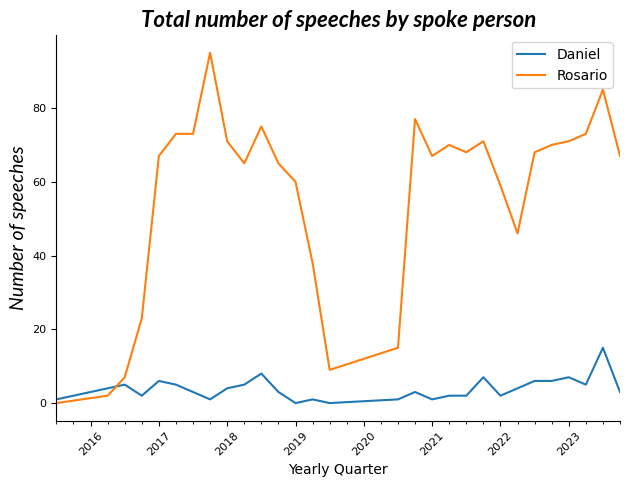

In [5]:
ax = (speech_data
      .groupby(speech_data["date"].dt.to_period("Q"))
      .spoke_person.value_counts().unstack().fillna(0)
      .plot(kind = "line"))
ax.spines[["right", "top"]].set_visible(False)
ax.get_legend().set_title("")
ax.tick_params(axis  = "both", 
               which = "major",
               labelsize = 8)
plt.xlabel("Yearly Quarter")
plt.ylabel("Number of speeches",
           fontname   = "Lato",
           fontstyle  = "italic",
           fontsize   = 14)
plt.title("Total number of speeches by spoke person",
          fontname   = "Lato",
          fontweight = "bold",
          fontstyle  = "italic",
          fontsize   = 16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Speech length

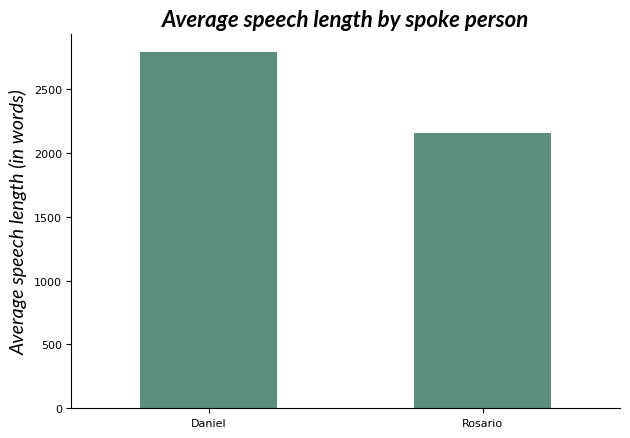

In [6]:
# Estimating total number of words by speech
speech_data["nwords"] = speech_data["content"].apply(lambda x: len(str(x).split()))

# Plotting the results
ax = (speech_data
      .groupby("spoke_person")
      .nwords
      .mean()
      .plot(kind = "bar", color = "#5B8E7D"))

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis  = "both", 
               which = "major",
               labelsize = 8)
plt.xlabel(None)
plt.ylabel("Average speech length (in words)",
           fontname   = "Lato",
           fontstyle  = "italic",
           fontsize   = 14)
plt.title("Average speech length by spoke person",
          fontname   = "Lato",
          fontweight = "bold",
          fontstyle  = "italic",
          fontsize   = 16)
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

## Top words

In [7]:
# Placing the speech text into a list
speech_list = {}
speech_list["Daniel"]  = (speech_data
                          .loc[speech_data["spoke_person"] == "Daniel"]
                          .content
                          .to_list())
speech_list["Rosario"] = (speech_data
                          .loc[speech_data["spoke_person"] == "Rosario"]
                          .content
                          .to_list())

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Downloading resources
nltk.download("punkt", quiet = True)
nltk.download("stopwords", quiet = True)
nltk.download("wordnet", quiet = True)

# Tokenization
tokenized_speech = {}
tokenized_speech["Daniel"]  = [word_tokenize(x, language = "spanish") for x in speech_list["Daniel"]]
tokenized_speech["Rosario"] = [word_tokenize(x, language = "spanish") for x in speech_list["Rosario"]]

In [9]:
# Stop words removal
stop_words = stopwords.words("spanish")
filtered_speeches = {}
filtered_speeches["Daniel"]  = [[word.lower() for word in speech if word.lower() not in stop_words]
                                for speech in tokenized_speech["Daniel"]]
filtered_speeches["Rosario"] = [[word.lower() for word in speech if word.lower() not in stop_words]
                                for speech in tokenized_speech["Rosario"]]

We could use NLTK for stemming and lemmatization. However, NLTK does not support Spanish lemmatization. Therefore, we use the SpaCy library for lemmatization. However, below there is a working example on how to perform this routines using the NLTK library:

In [45]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Stemming
stemmer_nltk = SnowballStemmer("spanish")
stemmed_speech_nltk = [
    [stemmer_nltk.stem(word) for word in speech]
    for speech in filtered_speeches["Rosario"]
]
# Lemmatization
lemmatizer_nltk = WordNetLemmatizer()
lemmatized_speeches_nltk = [
    [lemmatizer_nltk.lemmatize(word) for word in speech] 
    for speech in filtered_speeches["Rosario"]
]

## Lemmatization using SpaCy

We also need to install the spanish model by running the following from the console:
`python -m spacy download es_core_news_sm`

In [10]:
import spacy

# Load SpaCy model for Spanish
es_model = spacy.load("es_core_news_sm")

# Adding new stopwords
added_stopwords = {}
added_stopwords["Daniel"]  = ["és", "é", "multinoticias", "canal", "país", "república", "presidente", "comandante", "daniel", "ortega", "saavedra"]
added_stopwords["Rosario"] = ["és", "é", "multinoticias", "canal", "país", "mañana", "rosario", "murillo", "vicepresidenta", "república", "año", "edición mediodía"]

# Tokenization and Lemmatization with SpaCy
lemmatized_speeches = {}
lemmatized_speeches["Daniel"] = [
    [token.lemma_.lower() for token in es_model(speech) if not token.is_stop and token.is_alpha and token.lemma_.lower() not in added_stopwords["Daniel"]] 
    for speech in speech_list["Daniel"]
]
lemmatized_speeches["Rosario"] = [
    [token.lemma_.lower() for token in es_model(speech) if not token.is_stop and token.is_alpha and token.lemma_.lower() not in added_stopwords["Rosario"]] 
    for speech in speech_list["Rosario"]
]

## Plotting the results using a word cloud

In [11]:
from wordcloud import WordCloud

# Flattening results
all_tokens = {}
all_tokens["Daniel"] = [
    token for speech in lemmatized_speeches["Daniel"]
    for token in speech
]
all_tokens["Rosario"] = [
    token for speech in lemmatized_speeches["Rosario"]
    for token in speech
]

# Combine tokens into a single string
combined_tokens = {}
combined_tokens["Daniel"]  = ' '.join(all_tokens["Daniel"])
combined_tokens["Rosario"] = ' '.join(all_tokens["Rosario"])

In [12]:
from collections import Counter
token_counts_Daniel  = Counter(all_tokens["Daniel"])
print(token_counts_Daniel.most_common(25))
token_counts_Rosario = Counter(all_tokens["Rosario"])
print(token_counts_Rosario.most_common(25))

[('nicaragua', 1597), ('pueblo', 1178), ('paz', 887), ('venir', 789), ('general', 729), ('año', 671), ('the', 658), ('nicaragüense', 646), ('decir', 567), ('gobierno', 540), ('pueblos', 529), ('unidos', 512), ('palabra', 486), ('nacional', 474), ('países', 443), ('ejército', 439), ('yanqui', 428), ('lograr', 407), ('tener', 388), ('guerra', 388), ('querer', 368), ('familias', 366), ('momento', 366), ('policía', 364), ('sandino', 361)]
[('nicaragua', 18119), ('dios', 13751), ('familias', 13524), ('pueblo', 12763), ('paz', 12213), ('san', 8989), ('vida', 8413), ('nacional', 8035), ('salud', 7412), ('nicaragüense', 7142), ('trabajar', 6987), ('amor', 6974), ('semana', 6828), ('managua', 5804), ('familia', 5544), ('vivir', 5431), ('comunidad', 5154), ('trabajo', 5102), ('compañero', 4888), ('patria', 4689), ('gracias', 4504), ('entregar', 4498), ('ministerio', 4400), ('seguir', 4366), ('seguridad', 4355)]


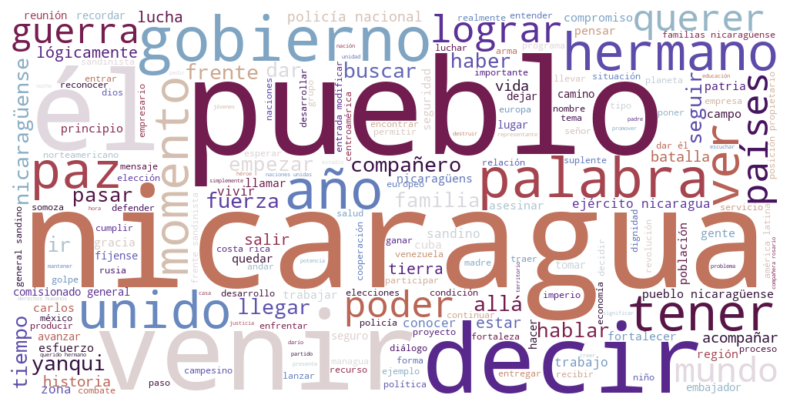

In [13]:
# Generating Word Cloud for Spoke Person: Daniel
wordcloud = WordCloud(width    = 1000, 
                      height   = 500, 
                      colormap = "twilight",
                      #   max_font_size = 72,
                      #   min_font_size = 5,
                      relative_scaling = 0.45,
                      background_color = "white").generate(combined_tokens["Daniel"])

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

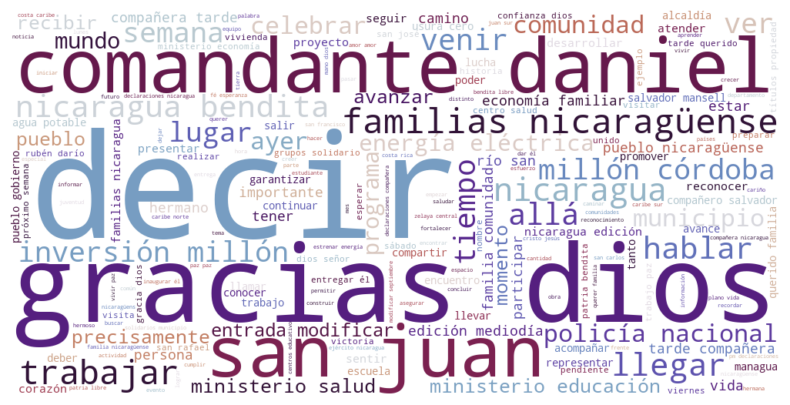

In [14]:
# Generating Word Cloud for Spoke Person: Rosario
wordcloud = WordCloud(width    = 1000, 
                      height   = 500, 
                      colormap = "twilight",
                      #   max_font_size = 72,
                      #   min_font_size = 5,
                      relative_scaling = 0.45,
                      background_color = "white").generate(combined_tokens["Rosario"])

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Saving data

In [20]:
import json

# Saving speech data
speech_data.to_csv("..//..//Data//speech_data.csv")

# Saving lemmatized & tokenized data
with open("..//..//Data//tklem_speeches.json", "w") as file:
    json.dump(lemmatized_speeches, file)